## Pokemon Analysis

####  Data Source: https://www.kaggle.com/abcsds/pokemon
#### Language: Python 3
#### Author: Preethi Evelyn Sadanandan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

from sklearn.cluster import KMeans

In [2]:
raw_data = pd.read_csv('pokemon_data.csv')

In [3]:
data = raw_data.copy()

In [4]:
data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
data.describe() 

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
data.isnull().sum() #no null values except for type 2, no need to exclude any rows

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
data.nunique() 
# There are 18 different types of pokemon
#There are 800 unique pokemon in this dataset

#             721
Name          800
Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [8]:
data['Total'] = data.iloc[:, 4:10].sum(axis = 1) 
#Adding a total column, the sum of HP, Attack, defense, sp atk, sp def and speed

In [9]:
data

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [10]:
genre = data.groupby('Type 1')

In [11]:
genre.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,334,AltariaMega Altaria,Dragon,Fairy,75,110,110,110,105,80,3,False,590
702,641,TornadusIncarnate Forme,Flying,NaN,79,115,70,125,80,111,5,True,580
703,641,TornadusTherian Forme,Flying,NaN,79,100,80,110,90,121,5,True,580
790,714,Noibat,Flying,Dragon,40,30,35,45,40,55,6,False,245


In [12]:
genre.mean().sort_values('Total', ascending = False) #The type 1 pokemon ranked by Total

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
Type 1,,,,,,,,,,
Dragon,474.375000,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,550.531250
Steel,442.851852,65.222222,92.703704,126.370370,67.518519,80.629630,55.259259,3.851852,0.148148,487.703704
Flying,677.750000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000,485.000000
Psychic,380.807018,70.631579,71.456140,67.684211,98.403509,86.280702,81.491228,3.385965,0.245614,475.947368
Fire,327.403846,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154,458.076923
Rock,392.727273,65.363636,92.863636,100.795455,63.340909,75.477273,55.909091,3.454545,0.090909,453.750000
Dark,461.354839,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516,445.741935
Electric,363.500000,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909,443.409091
Ghost,486.500000,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500,439.562500


In [13]:
genre.count().iloc[:, 1] #The number of each Type 1 pokemon present in the dataset

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Name, dtype: int64

In [14]:
top_dragon = data.loc[(data['Type 1'] == 'Dragon') & (data['Total'] > 650)]
top_dragon #Displaying the top 20 most powerful pokemon in the strongest category of Type 1 pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
409,373,SalamenceMega Salamence,Dragon,Flying,95,145,130,120,90,120,3,False,700
418,380,LatiasMega Latias,Dragon,Psychic,80,100,120,140,150,110,3,True,700
420,381,LatiosMega Latios,Dragon,Psychic,80,130,100,160,120,110,3,True,700
425,384,Rayquaza,Dragon,Flying,105,150,90,150,90,95,3,True,680
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780
494,445,GarchompMega Garchomp,Dragon,Ground,108,170,115,120,95,92,4,False,700
706,643,Reshiram,Dragon,Fire,100,120,100,150,120,90,5,True,680
707,644,Zekrom,Dragon,Electric,100,150,120,120,100,90,5,True,680
710,646,Kyurem,Dragon,Ice,125,130,90,130,90,95,5,True,660
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,700


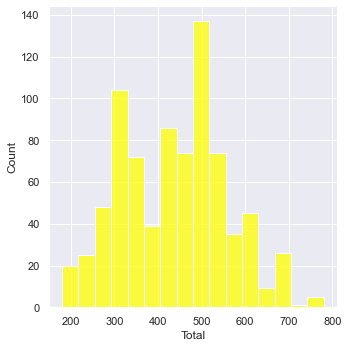

In [15]:
sns.displot(data['Total'], color = 'yellow') #Normal distribution of Total power of all pokemon

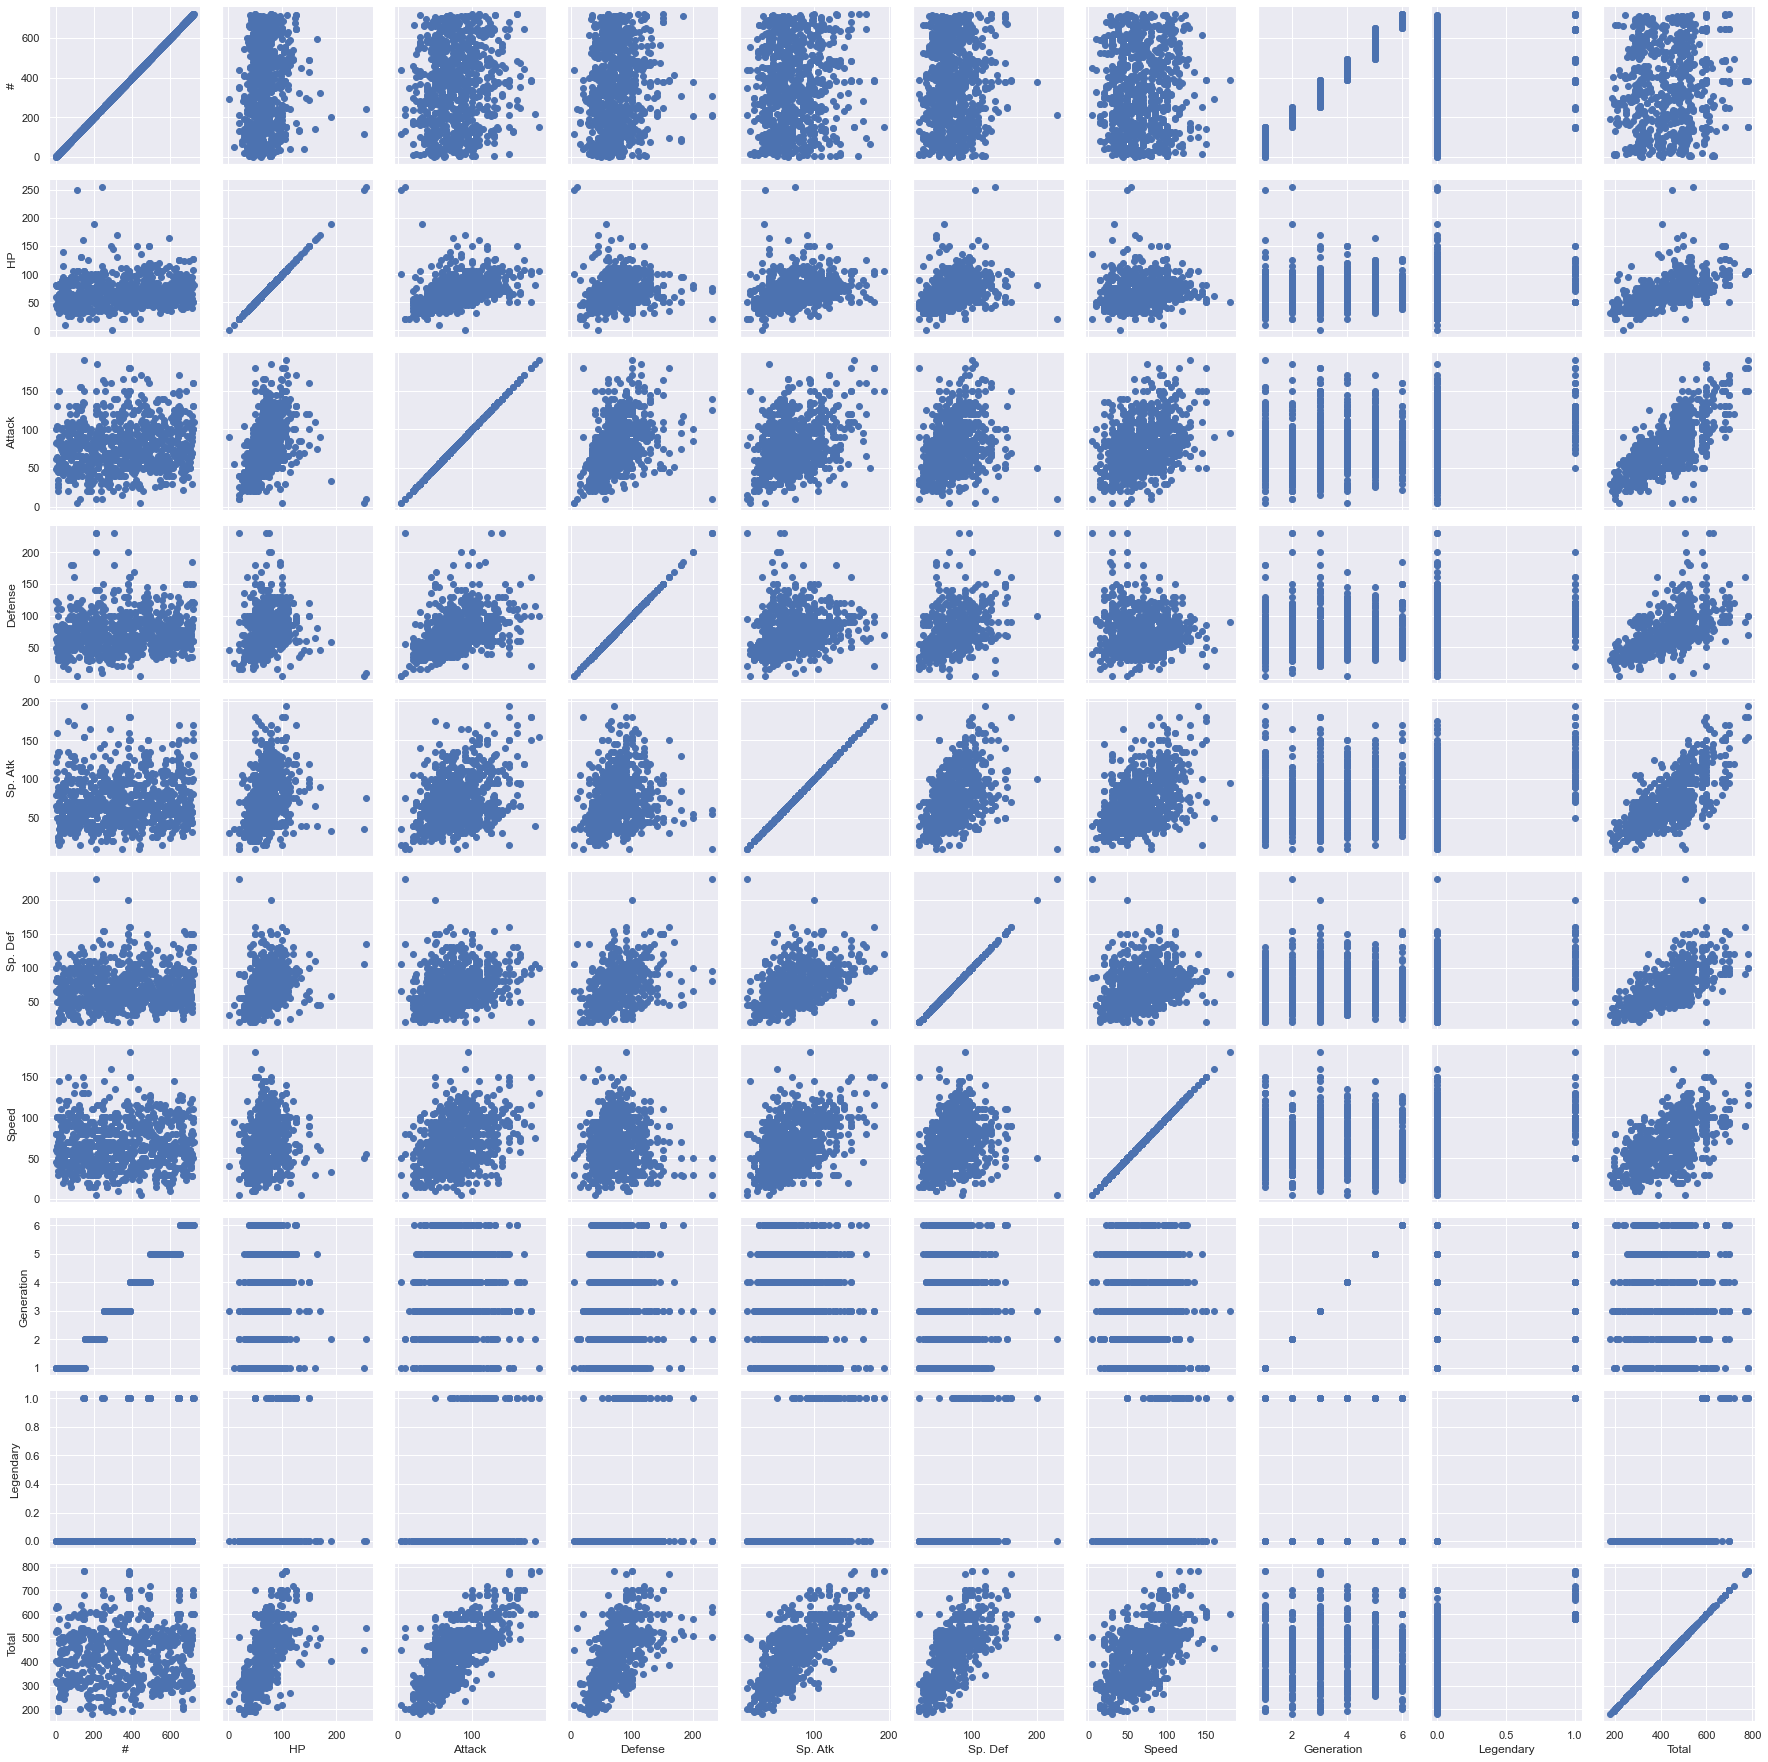

In [16]:
g = sns.PairGrid(data)
g.map(plt.scatter)

### Cluster Analysis

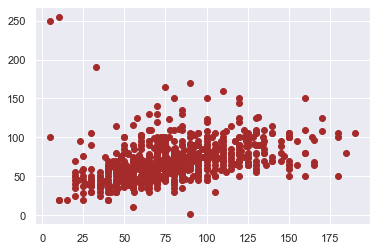

In [17]:
#Scatter plot between any two variables
plt.scatter(data['Attack'], data['HP'], c = 'brown')
plt.show()

In [18]:
X = data.iloc[:, 4:6]

In [19]:
#elbow method
wcss = []
for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(X)
    km_iter = kmeans.inertia_
    wcss.append(km_iter)

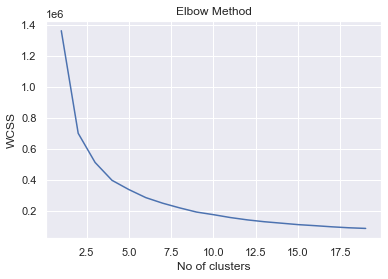

In [20]:
no_clusters = range(1,20)
plt.plot(no_clusters, wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
#Clustering the dataset of pokemon into 18(number of unique Type 1 categories)
kmeansten = KMeans(18) 
kmeansten.fit(X)

KMeans(n_clusters=18)

In [22]:
identified_clusters = kmeans.fit_predict(X)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters

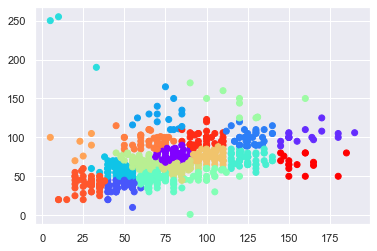

In [23]:
plt.scatter(data_with_clusters['Attack'], data_with_clusters['HP'], c = data_with_clusters['Cluster'], cmap = 'rainbow')

### Model to predict whether a pokemon is legendary or not

In [24]:
#Logistic model to predict legendary
log_data = data.copy()
log_data['Legendary'] = log_data['Legendary'].map({True: 1, False: 0})
log_data.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,0,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,0,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,0,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,0,625
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,0,309


In [25]:
#Implementing a model using statsmodels with only the variable 'Total'
#declaring variables
y = data['Legendary']
x1 = data.iloc[:, -1]

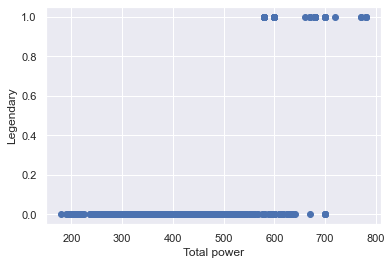

In [26]:
#visualising the scatter plot
plt.scatter(x1, y)
plt.xlabel('Total power')
plt.ylabel('Legendary')
plt.show()

In [28]:
x = sm.add_constant(x1)

In [29]:
#Lositic curve
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.118492
         Iterations 10


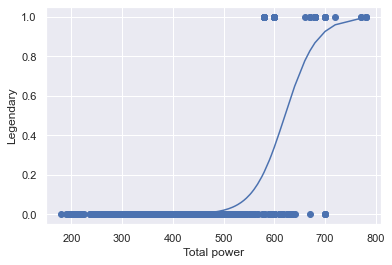

In [30]:
def f(x, b0, b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

#to visualise the logistic curve
plt.scatter(x1, y)
plt.xlabel('Total power')
plt.ylabel('Legendary')
plt.plot(x_sorted, f_sorted)

In [31]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Legendary   No. Observations:                  800
Model:                          Logit   Df Residuals:                      798
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                  0.5795
Time:                        17:18:57   Log-Likelihood:                -94.794
converged:                       True   LL-Null:                       -225.45
Covariance Type:            nonrobust   LLR p-value:                 8.886e-59
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.7388      2.066     -9.555      0.000     -23.788     -15.690
Total          0.0318      0.004      9.051      0.000       0.025       0.039
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### A logistic model using scikit-learn to predict if a pokemon is legendary

In [32]:
#declaring variables -> using the variables HP, Attack, Defense, Sp. Attack, Sp. Defense, Speed
y = log_data.iloc[:, 11]
x = log_data.iloc[:, 4:10]

In [33]:
#importing packages necessary for logit model using sci-kit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [35]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [36]:
#Making Predictions on the model and testing the model
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.94


In [37]:
#Evaluating the model using Confusion matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[145   5]
 [  4   6]]


In [38]:
# Use score method to get accuracy of model
score = logreg.score(x_test, y_test)
print("The R-squared of the model is",score)

The R-squared of the model is 0.94375


In [39]:
#Using the classification report to check the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       150
           1       0.55      0.60      0.57        10

    accuracy                           0.94       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.95      0.94      0.94       160



In [40]:
from sklearn.feature_selection import f_regression
f_regression(x_train,y_train) #checking the significance of each variable in the model

(array([ 60.87715902,  78.46644241,  47.54894053, 166.03965105,
        107.25920255,  85.59655452]),
 array([2.49124594e-14, 8.02752611e-18, 1.29319044e-11, 6.21738201e-34,
        2.44400270e-23, 3.28380116e-19]))

In [41]:
p_values = f_regression(x_train, y_train)[1]
p_values #all variables are significant

array([2.49124594e-14, 8.02752611e-18, 1.29319044e-11, 6.21738201e-34,
       2.44400270e-23, 3.28380116e-19])